# **Hi!**

Welcome to my (Agrim) first notebook for team Red, Datares' datablog team working on stackoverflow questions.

**The datasets that I will be working with are going to be datasets I have queried from this bigger dataset** – https://www.kaggle.com/stackoverflow/stackoverflow?select=stackoverflow_posts.
*   List of posts containing the tag R
*   List of posts containing the tag python



**My objectives for this exploratory analysis are going to be:-**

1.   Figure out the most popular tags in R and python questions
2.   Find historical popularity of certain packages/libraries
3.   A web like structure of tags based on other tags for both R and python questions on stack overflow

Once I complete those tasks, I will be choosing two distinct and popular packages/libraries available in both python/rstudio  and draw a comparison.

**Ideas:-**
1.   Number of raw questions asked.
2.   Questions asked as a perctage of all R and python questions asked.
3.   How central is this tool in other python libraries or R packages.
4.   Which of the two have a higher proportion of answered questions.
5.   Which of the two have a more engaging community (determine engagement score based on average number of repsonses to questions, wether or not question-asker accepted an answer, the average reponse time of answers to questions etc.)
6.   Comparing their popularity over time, especially against each other.


# Section 1 – R questions

**I.** Importing neccessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl

**II.**   (1) Loading neccessary dataset – Stack Overflow questions containing the tag R.

In [ ]:
from google.colab import files 
uploaded = files.upload()

Saving Tags.csv to Tags (1).csv


In [ ]:
import io 
Tags = pd.read_csv(io.BytesIO(uploaded['Tags.csv'])) 
Tags.head(10)

,Id,Tag
0,77434,vector
1,79709,memory
2,79709,function
3,79709,global-variables
4,79709,side-effects
5,95007,math
6,95007,statistics
7,103312,file
8,103312,file-io
9,103312,eof


*Note: the max number of tags per question on stack overflow can be 5, so excluding R, each question may only have 4 additional tags. If an ID is available more than once, that is simply due to that fact. Similarly, various R questions are simply not in this dataset since I excluded the ones with just ONE tag – R.*

**III.** Dropping NA values.

In [ ]:
Tags = Tags.dropna(axis=0)

**IV.** Plotting frequency of occurance of tags in R questions.

Text(0.5, 0, 'Number of tags')

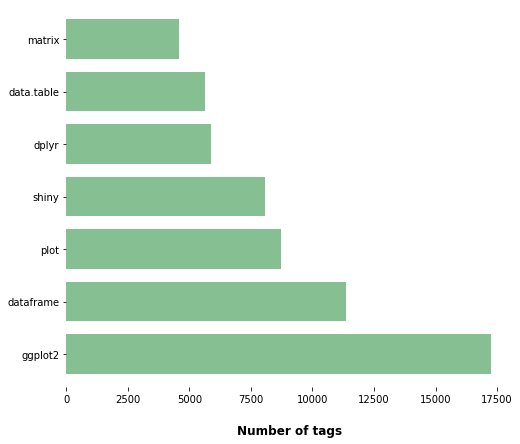

In [ ]:
freqPlot = Tags["Tag"].value_counts().head(7).plot(kind = "barh", figsize=(8, 7), color='#86bf91', zorder=1, width=0.75)

#removing borders
freqPlot.spines['right'].set_visible(False)
freqPlot.spines['top'].set_visible(False)
freqPlot.spines['left'].set_visible(False)
freqPlot.spines['bottom'].set_visible(False)

#setting x-label
freqPlot.set_xlabel("Number of tags", labelpad=20, weight='bold', size=12)

**V.** Plotting how many tags are available per question. From the graph below we realize that most questions only have one or two other tags.

Text(0.5, 0, 'Number of tags in a question')

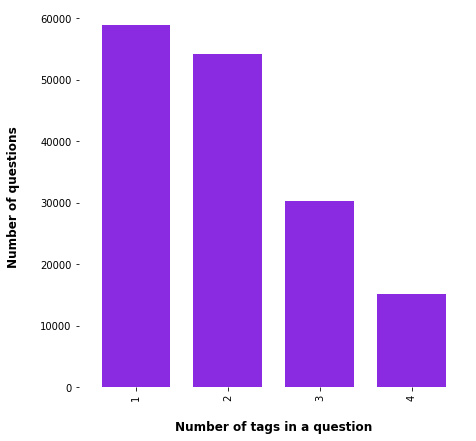

In [ ]:
numTagsPerID = Tags.groupby("Id")["Tag"].count().value_counts().plot(kind = "bar", color='blueviolet', width = 0.75, figsize=(7, 7))

#removing borders
numTagsPerID.spines['right'].set_visible(False)
numTagsPerID.spines['top'].set_visible(False)
numTagsPerID.spines['left'].set_visible(False)
numTagsPerID.spines['bottom'].set_visible(False)

#setting labels
numTagsPerID.set_ylabel("Number of questions", labelpad=20, weight='bold', size=12)
numTagsPerID.set_xlabel("Number of tags in a question", labelpad=20, weight='bold', size=12)

# Section 2 – python questions

Repeating the processes above for python:-

(without notes for every step)

In [ ]:
uploaded2 = files.upload()

Saving Tags_py.csv to Tags_py.csv


In [ ]:
Tags_py = pd.read_csv(io.BytesIO(uploaded2['Tags_py.csv'])) 
Tags_py.head(10)

,Id,Tag
0,469,python
1,469,osx
2,469,fonts
3,469,photoshop
4,502,python
5,502,windows
6,502,image
7,502,pdf
8,535,python
9,535,continuous-integration


I know I said no descriptions, but from the head we can clearly see that there exist python tags in the dataset, which I failed to delete while originally wrangling using SQL.

Let's remove all the rows with tag – python.

*Note: this still remains a dataset with just python tagged stack overflow questions.*

In [ ]:
#data cleaning
Tags_py = Tags_py.dropna(axis=0)
index_names = Tags_py[Tags_py['Tag']=='python'].index
Tags_py.drop(index_names, inplace = True)
Tags_py.head(10)

,Id,Tag
1,469,osx
2,469,fonts
3,469,photoshop
5,502,windows
6,502,image
7,502,pdf
9,535,continuous-integration
10,535,extreme-programming
12,594,sql
13,594,database


As we can see, we've successfully removed the irrelevant rows. Now on to visualization (axis labels are descriptive enough)

Text(0.5, 0, 'Number of tags (for Python questions)')

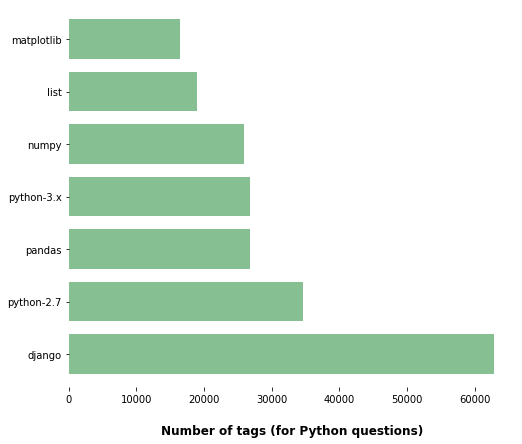

In [ ]:
freqPlot = Tags_py["Tag"].value_counts().head(7).plot(kind = "barh", figsize=(8, 7), color='#86bf91', zorder=1, width=0.75)

#removing borders
freqPlot.spines['right'].set_visible(False)
freqPlot.spines['top'].set_visible(False)
freqPlot.spines['left'].set_visible(False)
freqPlot.spines['bottom'].set_visible(False)

#setting x-label
freqPlot.set_xlabel("Number of tags (for Python questions)", labelpad=20, weight='bold', size=12)

Text(0.5, 0, 'Number of tags in a python question')

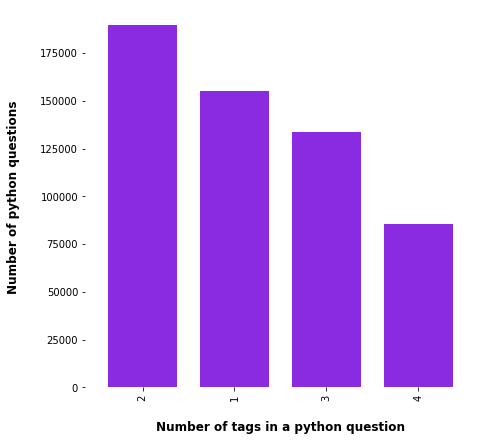

In [ ]:
numTagsPerID = Tags_py.groupby("Id")["Tag"].count().value_counts().plot(kind = "bar", color='blueviolet', width = 0.75, figsize=(7, 7))

#removing borders
numTagsPerID.spines['right'].set_visible(False)
numTagsPerID.spines['top'].set_visible(False)
numTagsPerID.spines['left'].set_visible(False)
numTagsPerID.spines['bottom'].set_visible(False)

#setting labels
numTagsPerID.set_ylabel("Number of python questions", labelpad=20, weight='bold', size=12)
numTagsPerID.set_xlabel("Number of tags in a python question", labelpad=20, weight='bold', size=12)

# Section 3 – Experimenting
